# Zillow Regression Project

* By Chenchen feng

## Project Goals

* The goal is to find the key drivers of property value for single-family properties on Zillow, then make recommendations to help the data science team have a better prediction on the future house value.

## Project Description

* In this report, we will analyze the Zillow 2017 single-family property transaction data, use the regression machine learning method to develop a model to prediction of the house value base on the selected features. Then give out the recommendations about how to improve the predictions for the future and my next steps.

## Initial Questions

1. Does bedroom count affect the house value?

2. Does bathroom count affect the house value?

3. Is there a relationship between fips and house value?

4. Is there a relationship between building year and house value?

5. Is there a relationship between square feet and house value?

## Data Dictionary

* bedroom : Number of bedrooms in home.
* bathroom : Number of bathrooms in home including fractional bathrooms.
* fips : Federal Information Processing Standard code.
* yearbuilt: The Year the principal residence was built.
* square_ft : Calculated total finished living area of the home.
* house_value : The total tax assessed value of the parcel.
* taxamount : The total property tax assessed for that assessment year.

## Wrangle Zillow Data

### To acquire the Zillow data, I used Zillow.properties_2017 database from MySQL server.

* select bedroom, bathroom, square_feet, fips, yearbuilt, house_value and tax amount from zillow.properties_2017 and rename the columns at the same time
* left join zillow.predictions_2017 and select transaction date like '2017%%'
* then choose prepertylandusetypeid = 261 which is single family properties code

In [96]:
# Acquire zillow data from MySql database 
import warnings
warnings.filterwarnings("ignore")
from acquire_zillow import get_new_zillow_data

df = get_new_zillow_data()

### To clean the data, I did flowing steps:

1. Missing values: since the percentage of missing values is only 0.4%, so I will just drop them.
2. Convert data type: convert bedroom, yearbuilt, square_ft and fips into int.
3. Set up a cut-off line to analyze majority of data: bedroom <= 6, bathroom <= 6, house_value < 2,000,000.

In [97]:
import prepare_zillow

train, validate, test = prepare_zillow.prep_zillow(df)

* Split the data into train 56%, validate 24%, test 20%.
* Our data is now split into 3 samples so that we can use the train sample to explore, fit to models and evaluate without looking at new data.
* The validate is used to verify that our models built are not overfit to the train dataset and get the best model.
* The test set is used to give an estimate of how this model will perform on data is has never seen in the future.

## Data Context

In this report, there are 52,441 observations in 2017 zillow data and 5 features will be used for my analysis to predict the house value.


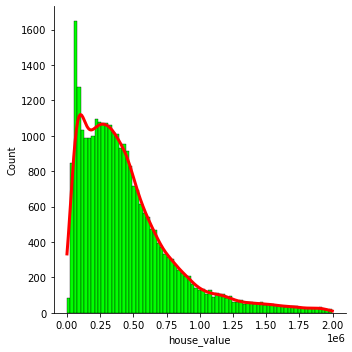

In [98]:
# overall house value distribution chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(x = 'house_value', data = train, kde=True, color='red',
            line_kws={'lw': 3}, facecolor='lime', edgecolor='black')

<AxesSubplot:xlabel='fips', ylabel='count'>

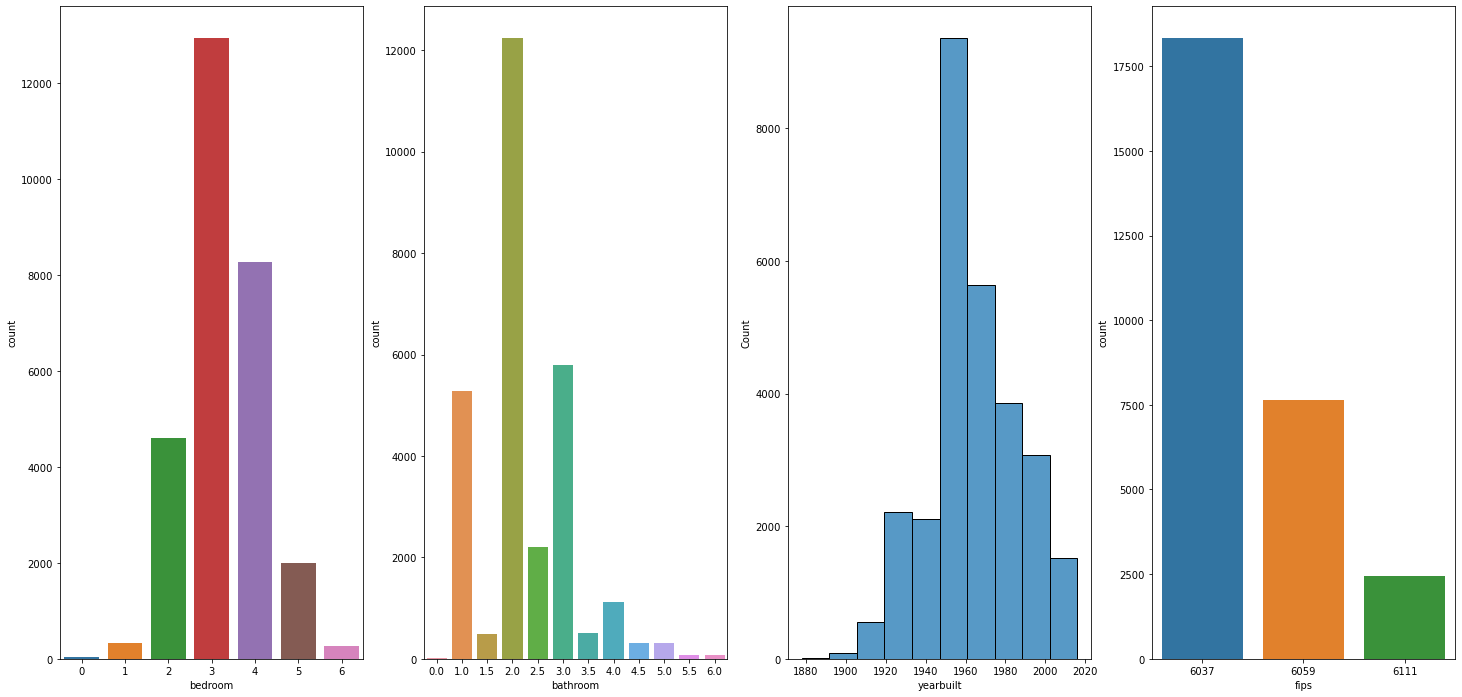

In [99]:
# categorical variables overview

figure, axes = plt.subplots(1,4, figsize=(25,12))
    
sns.countplot(x='bedroom', data=train, ax=axes[0])
sns.countplot(x='bathroom', data=train, ax=axes[1])
sns.histplot(x='yearbuilt', bins = 10, data=train, ax=axes[2])
sns.countplot(x='fips', data=train, ax=axes[3])

## Data Exploration

### Question :

    1. Does bedroom count affect the house value?
    2. Does bathroom count affect the house value?
    3. Is there a relationship between fips and house value?

<AxesSubplot:xlabel='fips', ylabel='house_value'>

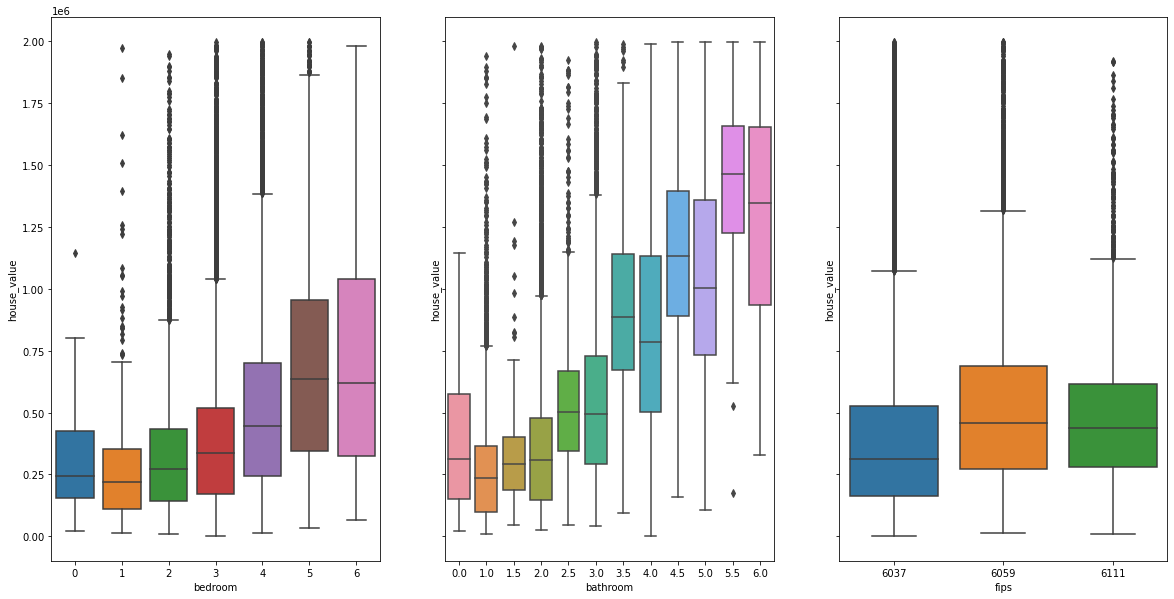

In [100]:
figure, axes = plt.subplots(1,3, sharey = True, figsize=(20,10))
    
sns.boxplot(x='bedroom', y='house_value', data=train, ax=axes[0])
sns.boxplot(x='bathroom', y='house_value', data=train, ax=axes[1])
sns.boxplot(x='fips', y='house_value', data=train, ax=axes[2])

In [95]:
pd.DataFrame({'fips': [6037, 6059, 6111],
              'county name': ['Los Angeles, CA', 'Orange, CA', 'Ventura, CA'],
             'average house value on train': [406496, 524572, 483373],
             'percentage of home count on train': [0.65, 0.27, 0.08]})

,fips,county name,average house value on train,percentage of home count on train
0,6037,"Los Angeles, CA",406496,0.65
1,6059,"Orange, CA",524572,0.27
2,6111,"Ventura, CA",483373,0.08


### Ansuwer:

    1. House value increases with bedroom count.
    2. House value increases with bathroom count, also it seems half bath is more valueable than full bath.
    3. Los Angeles has the higest count percentage but the lowest average price, which means prices are different by location.

### Questions: 

    4. Is there a relationship building year and house value?
    5. Is there a relationship between square feet and house value?

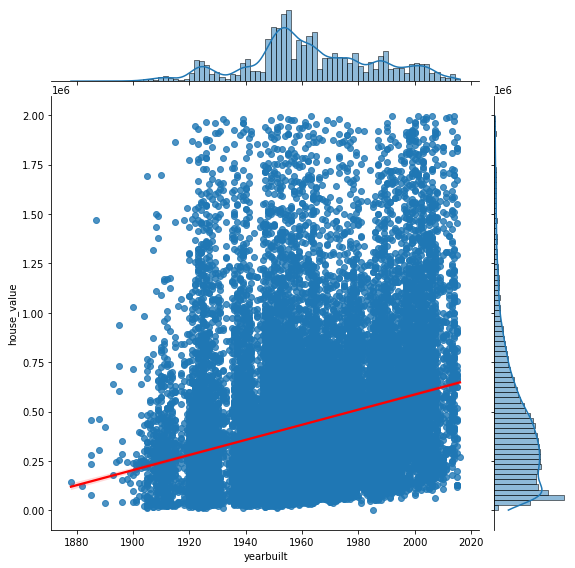

In [101]:
sns.jointplot(x='yearbuilt', y='house_value', data=train, kind='reg', line_kws={'color': 'red'}, height=8)

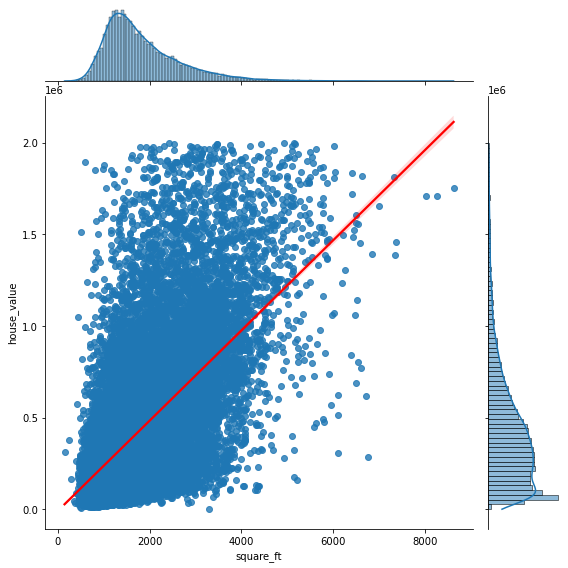

In [102]:
sns.jointplot("square_ft", "house_value", data=train, kind='reg', line_kws={'color': 'red'},height=8)

### Ansuwer:

    4. The house value has a low increase with built years.
    5. There is a very strong relationship between square feet and house value shows that generally bigger house is more expensive.

<AxesSubplot:>

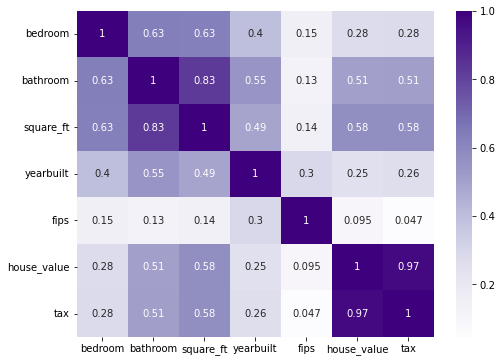

In [103]:
# correlation map for all features

plt.figure(figsize=(8,6))
correlation_table = train.corr()
sns.heatmap(correlation_table, cmap='Purples', annot=True)

### Takeaways:  
* Top three:
    1. square feet: 0.58
    2. bathroom: 0.51
    3. bedroom: 0.28

### Statistic Test for bedroom, bathroom and square_ft

* set alpha : 0.05


* H0: There is no correlation between given feature and house value.
* Ha: There is a correlation between given feature and house value.

In [104]:
from scipy.stats import pearsonr

In [105]:
# bedroom
r, p_value = pearsonr(train.bedroom, train.house_value)
if p_value < 0.05:
    print('We can reject the null hypothesis.')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis.


In [106]:
# bathroom
r, p_value = pearsonr(train.bathroom, train.house_value)
if p_value < 0.05:
    print('We can reject the null hypothesis.')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis.


In [107]:
# square feet
r, p_value = pearsonr(train.square_ft, train.house_value)
if p_value < 0.05:
    print('We can reject the null hypothesis.')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis.


### Takeaways:
Statistic test results also show that bedroom, bathroom and square_ft all has a correlation with house value.

## Exploration Summary:

Bedroom count, bathroom count, square feet, yearbuilt and fips all have some relationships with house value. Among those arributes, bedroom count, bathroom count and square feet have the strongest correlation with house value.

### Therefore, the features I will use for modeling:
* bedroom count
* bathroom count
* square feet

# Predicting House Value

Because house value is a continuous variable, so I will use  five different Regression machine learning models to fit the train. Those five models will use same features but different algorithms. Then evaluate on validate set for overfit and pick the best model on the test set.

The metrics I will use are RMSE (Root Mean Squared Error) and R2 score. RMSE is the most commonly used metric for regression model also it has the same unit as our target value which is 'dollar'. And R2 is also a very often used function compute the coefficient of determination.

(array([7529., 8132., 5898., 3076., 1595.,  861.,  522.,  371.,  265.,
         192.]),
 array([1.0000000e+03, 2.0062510e+05, 4.0025020e+05, 5.9987530e+05,
        7.9950040e+05, 9.9912550e+05, 1.1987506e+06, 1.3983757e+06,
        1.5980008e+06, 1.7976259e+06, 1.9972510e+06]),
 <BarContainer object of 10 artists>)

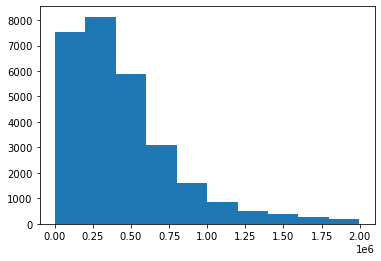

In [108]:
#Visualize my target variable
plt.hist(train.house_value)

## Baseline

* Set up a baseline on train and validate set, baseline value is the mean of house value on the train set.
* I will use RMSE (Root Mean Squared Error) to evaluate my baseline.

In [109]:
#Establish baselines for the train and validation subsets
from math import sqrt
from sklearn.metrics import mean_squared_error

baseline = train.house_value.mean()

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.house_value, train.baseline))
validate_rmse = sqrt(mean_squared_error(validate.house_value, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))

Train baseline RMSE: 354300.374389348.
Validation baseline RMSE: 347942.07118664036.


## Train

* Five different algorithm models on the train data set:

1. Linear Regression
2. Lasso-Lars
3. TweedieRegressor
4. 2nd degree Polynomial
5. Interaction only polynomial


### modeling data prep

In [110]:
x_train = train.drop(columns=['house_value','tax', 'yearbuilt', 'fips', 'baseline'])
y_train = train[['house_value']]

x_validate = validate.drop(columns=['house_value','tax', 'yearbuilt', 'fips', 'baseline'])
y_validate = validate[['house_value']]

x_test = test.drop(columns=['house_value','tax', 'yearbuilt', 'fips'])
y_test = test[['house_value']]

### scale the data

In [111]:
import sklearn.preprocessing
mms = sklearn.preprocessing.MinMaxScaler()
mms.fit(x_train[['bedroom','bathroom','square_ft']])

x_train[['bedroom','bathroom','square_ft']] = mms.transform(x_train[['bedroom','bathroom','square_ft']])
x_validate[['bedroom','bathroom','square_ft']] = mms.transform(x_validate[['bedroom','bathroom','square_ft']])
x_test[['bedroom','bathroom','square_ft']] = mms.transform(x_test[['bedroom','bathroom','square_ft']])

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### create train prediction dataframe for evaluation

In [113]:
import pandas as pd
import numpy as np
predictions_train = pd.DataFrame({'actual': train.house_value})
predictions_train['baseline'] = baseline

### fit the model to train

In [119]:
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions_train['lm'] = lm.predict(x_train)

lars = LassoLars(alpha=1.0)
lars.fit(x_train, y_train)
predictions_train['lasso_lars'] = lars.predict(x_train)

glm = TweedieRegressor(power=0, alpha=1)
glm.fit(x_train, y_train)
predictions_train['glm'] = glm.predict(x_train)

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(x_train)
x_train_poly = pd.DataFrame(
    poly.transform(x_train),
    columns=poly.get_feature_names(x_train.columns),
    index=train.index)
lm1 = LinearRegression()
lm1.fit(x_train_poly, y_train)
x_train_poly = poly.transform(x_train)
predictions_train['polynomial_degree_2'] = lm1.predict(x_train_poly)

poly1 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly1.fit(x_train)
x_train_poly1 = pd.DataFrame(
    poly1.transform(x_train),
    columns=poly1.get_feature_names(x_train.columns),
    index=train.index)
lm1.fit(x_train_poly1, y_train)
x_train_poly1 = poly1.transform(x_train)
predictions_train['polynomial_only_interaction'] = lm1.predict(x_train_poly1)

### Evaluate the train with RMSE

In [120]:
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions_train.actual, y_predicted))
predictions_train.apply(calculate_rmse).sort_values()

actual                              0.000000
polynomial_degree_2            284486.095617
polynomial_only_interaction    285074.050248
lm                             285551.721745
lasso_lars                     285552.028073
glm                            350756.070828
baseline                       354300.374389
dtype: float64

In [121]:
def calculate_r2(y_predicted):
    return r2_score(predictions_train.actual, y_predicted)

predictions_train.apply(calculate_r2).sort_values()

baseline                       0.000000
glm                            0.019907
lasso_lars                     0.350428
lm                             0.350429
polynomial_only_interaction    0.352601
polynomial_degree_2            0.355269
actual                         1.000000
dtype: float64

### Top three models are:
    
    1. 2nd degree polynomial 
    2. Interaction only polynomial
    3. Linear Regression

## Validate

In [122]:
predictions_validate = pd.DataFrame({'actual': validate.house_value})

lm.fit(x_train, y_train)
predictions_validate['lm'] = lm.predict(x_validate)

lm1 = LinearRegression()
lm1.fit(x_train_poly, y_train)
predictions_validate['polynomial_degree_2'] = lm1.predict(poly.transform(x_validate))

lm1.fit(x_train_poly1, y_train)
predictions_validate['polynomial_only_interaction'] = lm1.predict(poly1.transform(x_validate))

In [123]:
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions_validate.actual, y_predicted))
predictions_validate.apply(calculate_rmse).sort_values()

actual                              0.000000
polynomial_degree_2            280522.236177
polynomial_only_interaction    280852.130795
lm                             281616.658281
dtype: float64

In [124]:
def calculate_r2(y_predicted):
    return r2_score(predictions_validate.actual, y_predicted)

predictions_validate.apply(calculate_r2).sort_values()

lm                             0.344774
polynomial_only_interaction    0.348327
polynomial_degree_2            0.349857
actual                         1.000000
dtype: float64

### Best model is 2nd Degree Polynomial.

## Test 
* Use the best model which is 2nd Degree Polynomial to evaluate on the test set

In [125]:
# re-create our polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(x_train)
x_train_poly = pd.DataFrame(poly.transform(x_train),
                            columns=poly.get_feature_names(x_train.columns),index=train.index)
lm = LinearRegression()
lm.fit(x_train_poly, y_train)

LinearRegression()

In [126]:
# any transformations applied to your training data must be applied to the test as well
x_test_poly = poly.transform(x_test)
test_predictions = lm.predict(x_test_poly)
test_actual = test.house_value

In [127]:
# RMSE
sqrt(mean_squared_error(test_actual, test_predictions))

289424.54758118454

In [128]:
# R2 score
r2_score(test_actual, test_predictions)

0.3521693311368638

In [129]:
print('RMSE for 2nd Degree Polynomial model on the train dataset: {}'.format(sqrt(mean_squared_error(predictions_train.actual, predictions_train.polynomial_degree_2))))
print('RMSE for 2nd Degree Polynomial model on the validate dataset: {}'.format(sqrt(mean_squared_error(predictions_validate.actual, predictions_validate.polynomial_degree_2))))
print('RMSE for 2nd Degree Polynomial model on the test dataset: {}'.format(sqrt(mean_squared_error(test_actual, test_predictions))))

RMSE for 2nd Degree Polynomial model on the train dataset: 284486.0956169556
RMSE for 2nd Degree Polynomial model on the validate dataset: 280522.2361765069
RMSE for 2nd Degree Polynomial model on the test dataset: 289424.54758118454


In [131]:
print('R2 for 2nd Degree Polynomial model on the train dataset: {:.2}'.format(r2_score(predictions_train.actual, predictions_train.polynomial_degree_2)))
print('R2 for 2nd Degree Polynomial model on the validate dataset: {:.2}'.format(r2_score(predictions_validate.actual, predictions_validate.polynomial_degree_2)))
print('R2 for 2nd Degree Polynomial model on the test dataset: {:.2}'.format(r2_score(test_actual, test_predictions)))

R2 for 2nd Degree Polynomial model on the train dataset: 0.36
R2 for 2nd Degree Polynomial model on the validate dataset: 0.35
R2 for 2nd Degree Polynomial model on the test dataset: 0.35


### Expectation:

According to the test result, I expect there will be a $289,425 price difference with a correlation of 0.35 for my future prediction if the data souce has no major change.

# Conclusion

## Summary

By analyzing the key drivers of the majority of Zillow single house value of 2017, we built a 2nd degree polynomisl regression model with the top three attributes (bedroom, bathroom, square ft) to predict the house value. The RMSE for the test set is $289,425 and the r2 score is 0.35.

## Recommendations

This is a very general and basic overall report only uses the most basic features, to show what I learned from the regression model with the data science pipeline. So I didn't dig deeper in this report.

This model result will not look good on low-value houses like some houses in Los Angeles, since the average unit prices are different by location. Therefore, using different models and feature combinations for different locations will give us a better prediction.


## Next Steps

1. I would like to do individual exploration and build different models for different locations to get a better prediction.

2. Bring more features to explore, and use different algorithms and metrics to improve the overall performance.

#### Github link:

https://github.com/Chenchen070/zillow_regression_project.git